In [88]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
# import missingno as msno
import matplotlib.pyplot as plt
# import geopandas as gpd
# import plotly.io as pio
# import plotly.express as px
# import plotly.graph_objects as go
# import cufflinks as cf
import math

%matplotlib inline 

In [89]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Modelo Ridge

In [90]:
data_location = "Data/properati_final.csv"

data = pd.read_csv(data_location, sep=",", encoding="UTF-8")

data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'properati_url', 'parrilla',
       'quincho', 'patio', 'balcon', 'pileta', 'cochera', 'amenities',
       'ciudad', 'barrio', 'subway_distance', 'precio_m2',
       'segmento_precio_m2'],
      dtype='object')

In [91]:
mask = data.state_name == 'Capital Federal'
data = data[mask]

<Figure size 720x432 with 0 Axes>

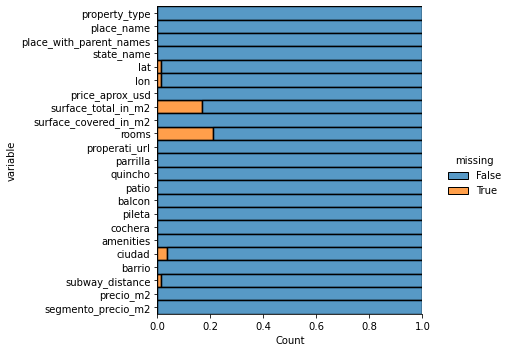

In [92]:
plt.figure(figsize=(10,6))
sns.displot(data=data.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25)

In [93]:
data.lat.isnull().sum()

309

In [94]:
data.dropna(subset = ["lat"], inplace=True)

In [95]:
data.lat.isnull().sum()
data.shape

(23760, 23)

In [96]:
data.lon.isnull().sum()


0

In [97]:
columns_with_na_dropped = data.dropna(axis=0)
data.shape

(23760, 23)

<Figure size 720x432 with 0 Axes>

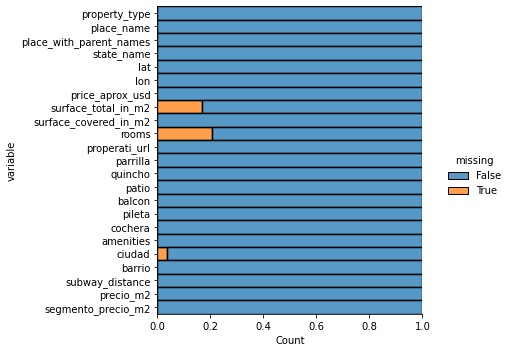

In [98]:
plt.figure(figsize=(10,6))
sns.displot(data=data.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25)

In [99]:
data['price_aprox_usd'] = 2 * data.price_aprox_usd

X = data[['lat', 'lon', 'subway_distance', 'surface_covered_in_m2', 'price_aprox_usd']]

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

y = data['precio_m2']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 117)

model_ridge_cv = linear_model.RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, normalize=False, cv=10)

model_fit_ridge_cv = model_ridge_cv.fit(X_train, y_train)

print(model_fit_ridge_cv.alpha_)

print(model_fit_ridge_cv.best_score_)

10.0
0.17284222985880573


In [101]:
best_alpha = model_fit_ridge_cv.alpha_
model_ridge = linear_model.Ridge(alpha = best_alpha, fit_intercept = True, normalize = False)
model_fit_ridge = model_ridge.fit(X_train, y_train)
print(model_fit_ridge.coef_)
print(model_fit_ridge.intercept_)
print(model_fit_ridge.score(X_train, y_train))

[ -557.11963672   120.60964759  -780.13962342 -1552.37914532
  2342.99999989]
3060.3501038635122
0.27007705791058256


In [102]:
model_fit_ridge.score(X_test, y_test)

0.17588766414101187

# Lasso

In [103]:

data['price_aprox_usd'] = 2 * data.price_aprox_usd

X = data[['lat', 'lon', 'subway_distance', 'surface_covered_in_m2', 'price_aprox_usd']]

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

y = data['precio_m2']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 117)

model_lasso_cv = linear_model.LassoCV(alphas= [0.05, 0.06, 0.07, 0.08, 0.09, 0.95, 0.97, 0.1, 0.12, 0.15, 0.2, 0.3, 1.0, 10.0], 
                                   fit_intercept=True, normalize=False, cv=10, max_iter=1e4)

model_fit_lasso_cv = model_lasso_cv.fit(X_train, y_train)

print(model_fit_lasso_cv.alpha_)

print(model_fit_lasso_cv.score(X_train, y_train))


10.0
0.269942768052287


In [105]:
best_alpha = model_fit_lasso_cv.alpha_
model_lasso = linear_model.Lasso(alpha = best_alpha, fit_intercept = True, normalize = False)
model_fit_lasso = model_lasso.fit(X_train, y_train)
print(model_fit_lasso.coef_)
print(model_fit_lasso.intercept_)
print(model_fit_lasso.score(X_test, y_test))

[ -513.66019593   123.76174073  -680.38237958 -1530.51751321
  2320.42836328]
3060.799491564394
0.19518145017627775


In [106]:
model = linear_model.LinearRegression()

model_fit = model.fit(X_train, y_train)
print(model_fit.coef_)
print(model_fit.intercept_)
print(model_fit.score(X_test, y_test))

[ -559.62055077   119.29749013  -785.39017133 -1555.11612022
  2346.15266408]
3060.325418653825
0.1749694468917844


# Regresión lineal múltiple